In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## Random Forest Model

Create a simple random forest function using the sklearn implementation. Set the max depth equal to None to ensure that all leaves are pure.

In [2]:
def random_forest_classifier_model(X_train, y_train, X_test, y_test, num_estimators):
        
    rf_model = RandomForestClassifier(n_estimators=num_estimators, max_depth=None)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    error = 1 - accuracy_score(y_test, rf_predictions)

    return error

## Parametric Deep Neural Network

Create a simple deep neural network model with three total layers. Utilize for numerical datasets.

In [3]:
def parametric_deep_neural_network(X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate, 
                                   callback_patience
                                  ):

    dnn_model = Sequential()

    dnn_model.add(Dense(32, activation = 'relu'))
    dnn_model.add(Dense(16, activation = 'relu'))
    dnn_model.add(Dense(units = 3, activation = 'softmax'))

    # sgd_optimizer = SGD(lr = 0.001, momentum = 0.9)
    adam_optimizer = Adam(learning_rate=learning_rate)
    dnn_model.compile(optimizer = adam_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=callback_patience)

    dnn_model.fit(x = X_train,
                 y = y_train,
                 epochs = epochs,
                verbose = 0,
                 batch_size = batch_size,
                 validation_data = (X_test, y_test),
                 callbacks = [early_stop]
                 )

    losses = pd.DataFrame(dnn_model.history.history)
    losses[['loss','val_loss']].plot(figsize = (10,7))
    plt.title('Training Loss and Validation Loss over each Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    dnn_predictions = dnn_model.predict_classes(X_test)
    score = dnn_model.evaluate(X_test, y_test, batch_size=None, verbose=0, sample_weight=None, steps=None,
        callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
        return_dict=False)

    return 1 - score[1]

## Sample Size Split

A function to randomly split data into a desired sample size.

In [4]:
def choose_data_sample_size(X, y, samples):
    
    random_indices = random.sample(range(X.shape[0]), samples)

    X = X[random_indices]
    y = y[random_indices]

    return X, y

## Test Functionality

Run each model on a small sample dataset

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


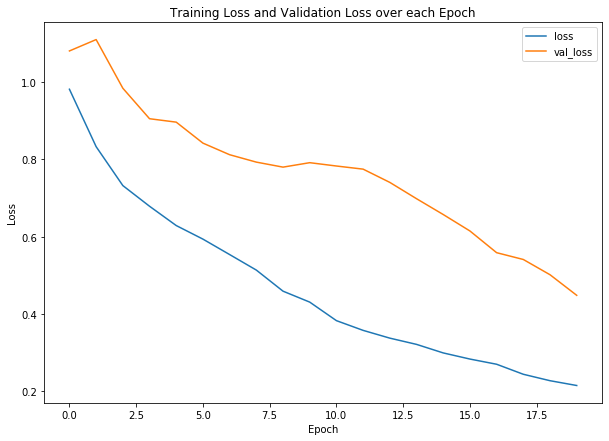

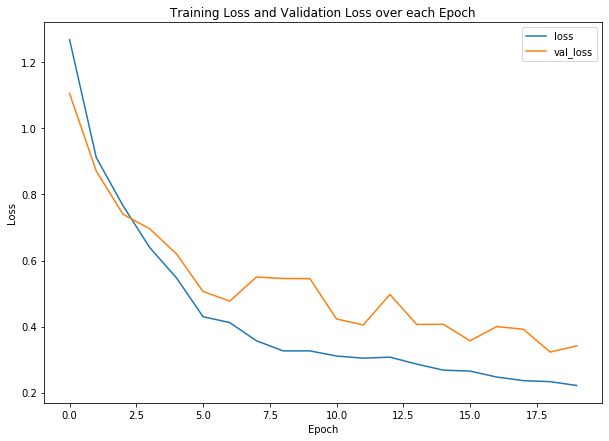

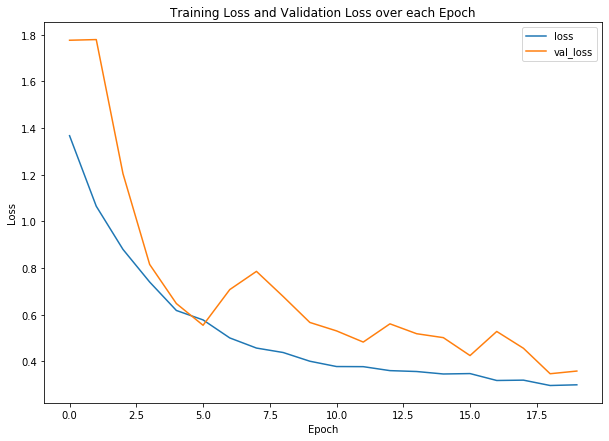

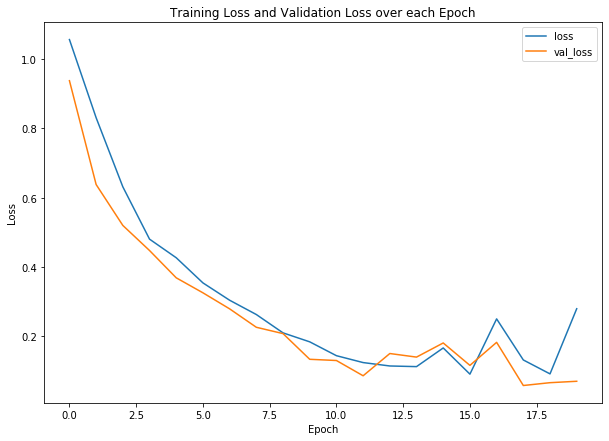

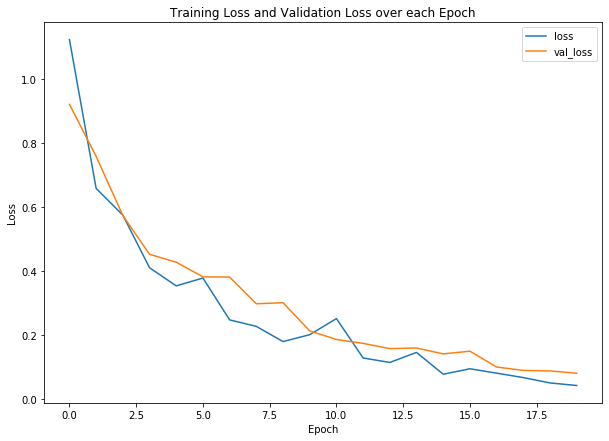

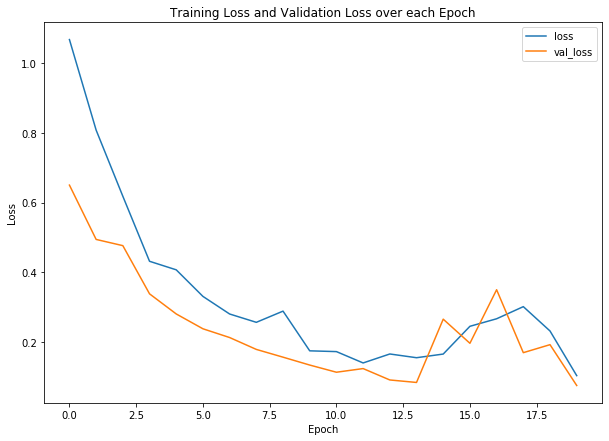

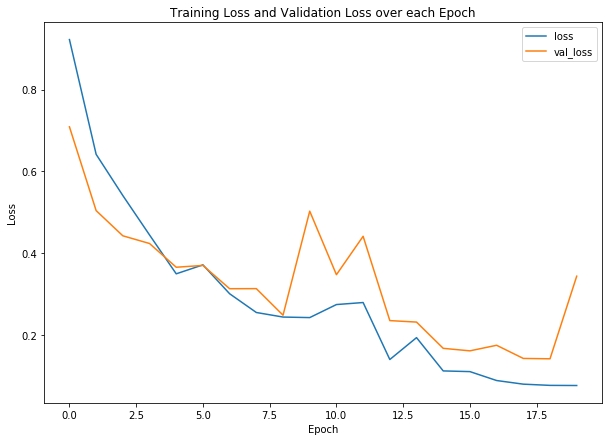

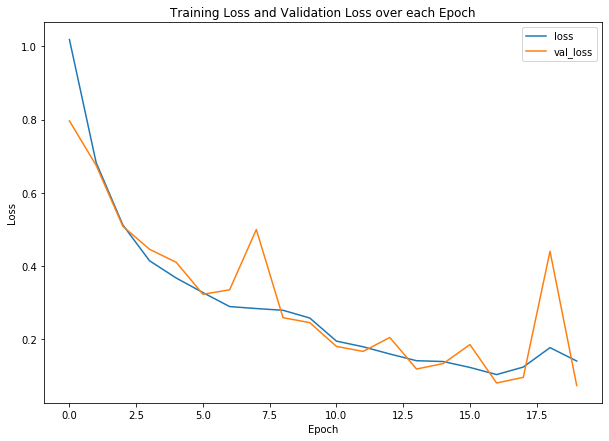

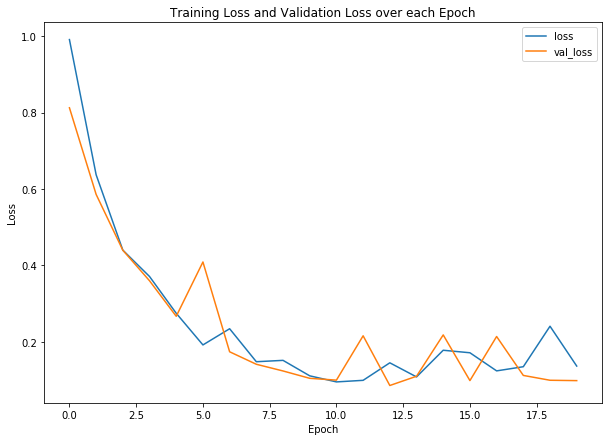

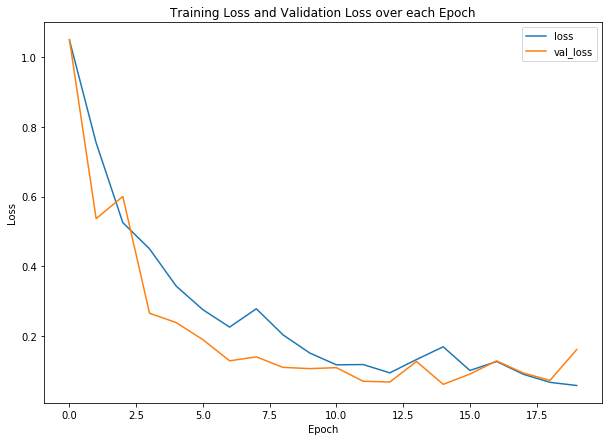

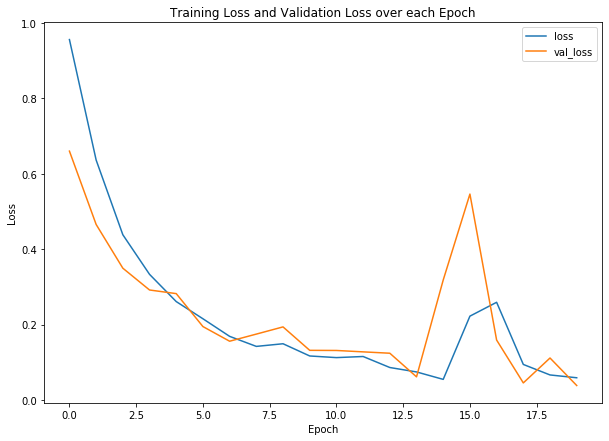

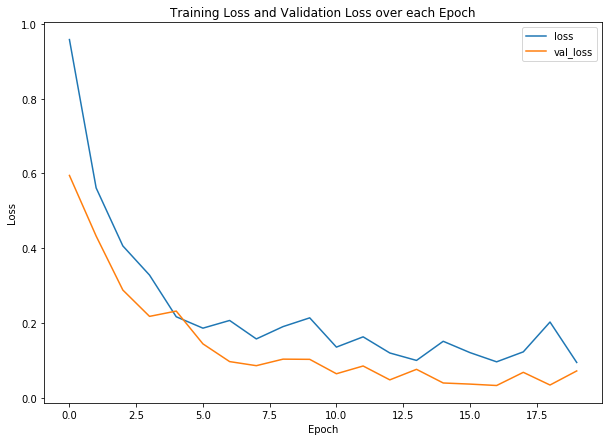

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

X = data['data']
y = data['target']

random_forest_classification_errors = []
parametric_dnn_classification_errors = []

for max_sample_size in range(30,X.shape[0],10):
    
    X_scaled, y_scaled = choose_data_sample_size(X, y, max_sample_size)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=101)

    rf_error = random_forest_classifier_model(X_train, y_train, X_test, y_test, 20)
    random_forest_classification_errors.append(rf_error)
    
    y_train=to_categorical(y_train,num_classes=3)
    y_test=to_categorical(y_test,num_classes=3)

    dnn_error = parametric_deep_neural_network(X_train, y_train, X_test, y_test, 20, 8, 0.01, 50)
    parametric_dnn_classification_errors.append(dnn_error)

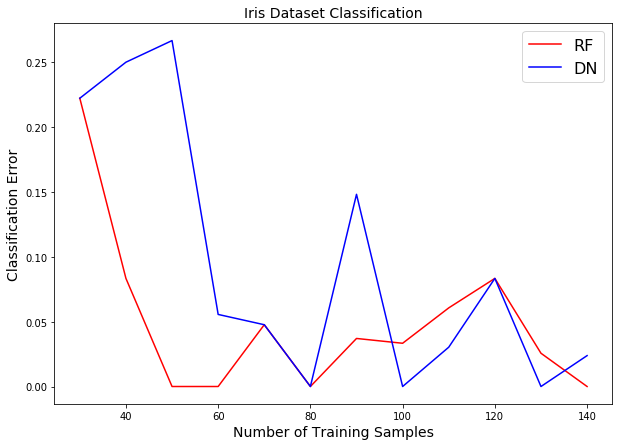

In [18]:
plt.figure(figsize = (10,7))
plt.plot(range(30,X.shape[0],10), random_forest_classification_errors, color= 'r')
plt.plot(range(30,X.shape[0],10), parametric_dnn_classification_errors, color= 'b')
plt.title('Iris Dataset Classification', fontsize=14)
plt.ylabel('Classification Error', fontsize=14)
plt.xlabel('Number of Training Samples', fontsize=14)
plt.legend(['RF', 'DN'], prop={'size': 16})